<a href="https://colab.research.google.com/github/antonypaulson/Detecting_interesting_VC_investments/blob/master/TCG_scoring_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Importing the dataset
df = pd.read_csv('frame_scoring_model.csv')
df.head()

,itunes_app_id,app_name,developer,category,rating_oo5_x,num_ratings_x,has_iap,release_date,age_rating,file_size,languages,price,subscription_service,top_rank_y,top_rank_days_y,growth_y,n_languages,curr_date,active_days,avg_daily_growth,max_growth_rate
0,1000008721,DYC TongShu,Darren Gibbs,Lifestyle,5.0,6.0,False,2016-09-07,4+,10.1,['English'],9.99,0,166.0,1,0.0,1,2019-06-11,1007,0.000000,0.000000
1,1000017994,Cardiogram for Apple Watch,"Cardiogram, Inc.",Health & Fitness,4.2,2700.0,True,2019-06-03,12+,80.6,['English'],0.00,1,16.0,1,72.0,1,2019-06-11,8,9.000000,81.818182
2,1000077500,ACLS Advisor 2017 Guidelines,Paul Chan,Medical,1.2,9.0,True,2017-03-13,12+,10.3,['English'],0.00,0,71.0,1,30.0,1,2019-06-11,820,0.036585,29.702970
3,1000103741,Mini Taiko,Jason Lew,Music,5.0,4.0,True,2015-08-06,4+,31.0,"['English', ' Japanese']",1.99,0,79.0,1,37.0,2,2019-06-11,1405,0.033790,31.896552
4,1000129248,Life Budget - Personal Finance & Money Management,Farzad Farhoosh,Finance,4.3,58.0,True,2016-01-13,4+,54.2,"['English', ' Dutch', ' French', ' German', ' ...",0.00,0,71.0,1,72.0,7,2019-06-11,1245,0.065753,50.349650


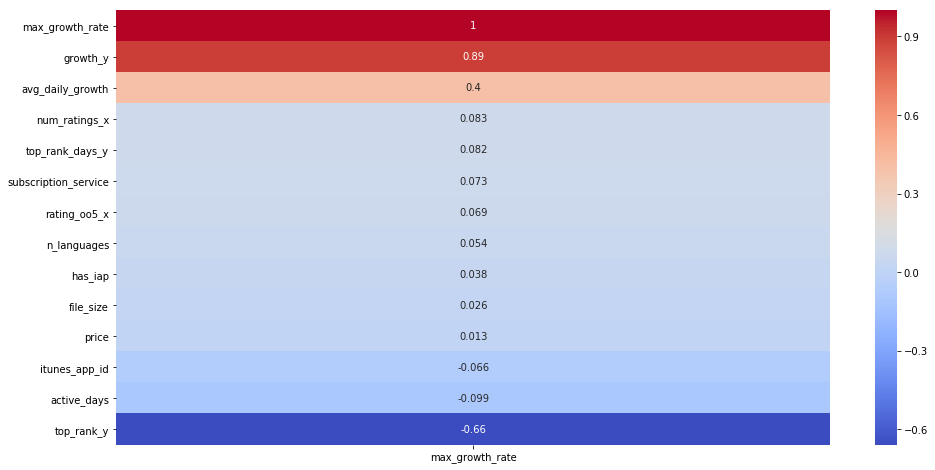

In [0]:
plt.figure(figsize = (16,8))
focus = df.corr()[['max_growth_rate']].sort_values(by = 'max_growth_rate', ascending = False)
sns.heatmap(focus, cmap ='coolwarm', annot = True);

In [0]:
#Removing outliers
df[df['growth_y'] > 200]
df.drop([37982, 45776], inplace = True)

In [0]:
#Distribution of growth
grth_intervals = np.histogram_bin_edges(df['growth_y'], bins = 5)
#scoring model growth score
df['growth_score'] = pd.cut(df['growth_y'], bins = 5, labels=[2,4,6,8,10])

In [0]:
#Distribution of daily growth
daily_grth_intervals = np.histogram_bin_edges(df['avg_daily_growth'], bins = 5)
#Daily growth score
df['daily_growth_score'] = pd.cut(df['avg_daily_growth'], bins = 5, labels = [2,4,6,8,10])

In [0]:
#Max growth rate
max_grth_rate_intervals = np.histogram_bin_edges(df['max_growth_rate'], bins = 5)
#Max growth score
df['max_growth_score'] = pd.cut(df['max_growth_rate'], bins = 5, labels = [2,4,6,8,10])

In [0]:
#Top rank days
top_rank_days_intervals = np.histogram_bin_edges(df['top_rank_days_y'], bins = 5)
#top rank days score
df['top_rank_days_score'] = pd.cut(df['top_rank_days_y'], bins = 5, labels = [2,4,6,8,10])

In [0]:
#Top rank
top_rank_intervals = np.histogram_bin_edges(df['top_rank_y'], bins = 5)
#top rank score
df['top_rank_score'] = pd.cut(df['top_rank_y'], bins = 5, labels = [10,8,6,4,2])

In [0]:
#Subcription app score
df['subscription_score'] = df['subscription_service'].apply(lambda a: 20 if a == 1 else 0)

In [0]:
np.histogram_bin_edges(df['rating_oo5_x'], bins = 5)

array([1. , 1.8, 2.6, 3.4, 4.2, 5. ])

In [0]:
#Rating oo5
rating_oo5_intervals = np.histogram_bin_edges(df['rating_oo5_x'], bins = 5)
#Rating oo5 score
df['rating_oo5_score'] = pd.cut(df['rating_oo5_x'], bins = 5, labels = [1,2,3,4,5])

In [0]:
#Active days
active_days_intervals = np.histogram_bin_edges(df['active_days'], bins = 10)
#Rating oo5 score
df['active_days_score'] = pd.cut(df['active_days'], bins = 10, labels = [5,4.5,4,3.5,3,2.5,2,1.5,1,0.5])
active_days_intervals

array([   0. ,  376.9,  753.8, 1130.7, 1507.6, 1884.5, 2261.4, 2638.3,
       3015.2, 3392.1, 3769. ])

In [0]:
#Category of investment
category_score = []
for i in df['category']:
  if i == 'Health & Fitness':
    category_score.append(10)
  elif i == 'Finance':
    category_score.append(8)
  elif i == 'Social Networking':
    category_score.append(6)
  elif i == 'Travel':
    category_score.append(4)
  elif i == 'Education':
    category_score.append(2)
  else:
    category_score.append(0)
df['category_score'] = category_score

In [0]:
#Creating a dataframe of developers that have more than 1 highly growing app
developers = df[df['growth_score'] >= 8]['developer'].value_counts()[:91]
df_developers = pd.DataFrame(developers)
df_developers.columns = ['developer_counts']
growth_score_intervals = np.histogram_bin_edges(df_developers['developer_counts'], bins = 5)
df_developers['developer_score'] = pd.cut(df_developers['developer_counts'], bins = 5, labels = [2.0,4.0,6.0,8.0,10.0])
df_developers.head(5)

,developer_counts,developer_score
"Pocket Prep, Inc.",11,10.0
GPS Tour Guide,8,8.0
Higher Learning Technologies,7,6.0
"Gray Television Group, Inc.",6,6.0
Google LLC,5,4.0


In [0]:
#Creating a column for developer scores
developer_score = []
for i in df['developer']:
  if i in df_developers.index:
    developer_score.append(df_developers.loc[i]['developer_score'])
  else:
    developer_score.append(0)
df['developer_score'] = developer_score

In [0]:
df['developer_score'].value_counts()

0.0     66503
2.0      1717
4.0       312
6.0       183
10.0       80
8.0        33
Name: developer_score, dtype: int64

In [0]:
#Summing the score up
score_list = ['growth_score',
       'daily_growth_score', 'max_growth_score', 'top_rank_days_score',
       'top_rank_score', 'subscription_score', 'rating_oo5_score',
       'active_days_score', 'category_score', 'developer_score']
df['total_score'] = df[score_list].sum(axis=1)


In [0]:
#Checking the dataframe
df.head()

,itunes_app_id,app_name,developer,category,rating_oo5_x,num_ratings_x,has_iap,release_date,age_rating,file_size,languages,price,subscription_service,top_rank_y,top_rank_days_y,growth_y,n_languages,curr_date,active_days,avg_daily_growth,max_growth_rate,growth_score,daily_growth_score,max_growth_score,top_rank_days_score,top_rank_score,subscription_score,rating_oo5_score,active_days_score,category_score,developer_score,total_score
0,1000008721,DYC TongShu,Darren Gibbs,Lifestyle,5.0,6.0,False,2016-09-07,4+,10.1,['English'],9.99,0,166.0,1,0.0,1,2019-06-11,1007,0.000000,0.000000,2,2,2,2,2,0,5,4.0,0,0.0,19.0
1,1000017994,Cardiogram for Apple Watch,"Cardiogram, Inc.",Health & Fitness,4.2,2700.0,True,2019-06-03,12+,80.6,['English'],0.00,1,16.0,1,72.0,1,2019-06-11,8,9.000000,81.818182,4,2,10,2,10,20,4,5.0,10,0.0,67.0
2,1000077500,ACLS Advisor 2017 Guidelines,Paul Chan,Medical,1.2,9.0,True,2017-03-13,12+,10.3,['English'],0.00,0,71.0,1,30.0,1,2019-06-11,820,0.036585,29.702970,2,2,4,2,8,0,1,4.0,0,0.0,23.0
3,1000103741,Mini Taiko,Jason Lew,Music,5.0,4.0,True,2015-08-06,4+,31.0,"['English', ' Japanese']",1.99,0,79.0,1,37.0,2,2019-06-11,1405,0.033790,31.896552,2,2,4,2,8,0,5,3.5,0,0.0,26.5
4,1000129248,Life Budget - Personal Finance & Money Management,Farzad Farhoosh,Finance,4.3,58.0,True,2016-01-13,4+,54.2,"['English', ' Dutch', ' French', ' German', ' ...",0.00,0,71.0,1,72.0,7,2019-06-11,1245,0.065753,50.349650,4,2,6,2,8,0,5,3.5,8,0.0,38.5


In [0]:
df[["growth_score", 
    "daily_growth_score", 
    "max_growth_score", 
    "top_rank_days_score", 
    "top_rank_score",
   "rating_oo5_score",
   "active_days_score"]] = df[["growth_score", 
                               "daily_growth_score", 
                               "max_growth_score", 
                               "top_rank_days_score", 
                               "top_rank_score",
                               "rating_oo5_score",
                               "active_days_score"]].apply(pd.to_numeric)

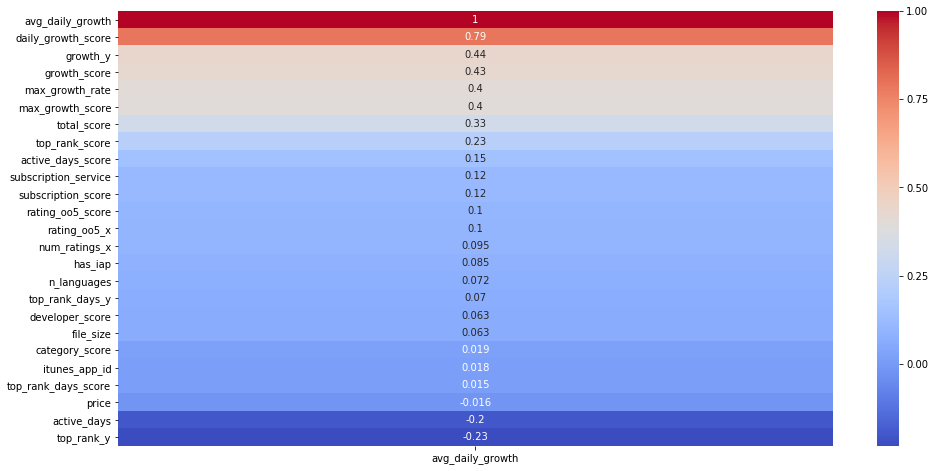

In [0]:
plt.figure(figsize = (16,8))
focus = df.corr()[['avg_daily_growth']].sort_values(by = 'avg_daily_growth', ascending = False)
sns.heatmap(focus, cmap ='coolwarm', annot = True);

In [0]:
tcg_magic_15 = ['The Action Network: Sports App',
                'ESPN: Live Sports & Scores',
                #'Netflix',
                'AllTrails: Hike, Run & Cycle',
                'Headspace: Meditation & Sleep',
                'Quizlet',
                'Duolingo',
                'The Athletic: Sports Coverage',
                'Prodigy Math Game',
                'onX Hunt: #1 GPS Hunting Map',
                'HOOKED',
                'Crunchyroll',
                'The Wall Street Journal.',
                'MLB At Bat',
                'Surfline']

In [0]:
tcg_magic  = df[df['app_name'].isin(tcg_magic_15)][["app_name","growth_score", 
                               "daily_growth_score", 
                               "max_growth_score", 
                               "top_rank_days_score", 
                               "top_rank_score",
                               "rating_oo5_score",
                               "active_days_score",
                                "developer_score",
                                 "category_score",
                                  "subscription_score",
                                      "total_score"]]

In [0]:
top_scorers = df.sort_values(by = 'total_score', ascending = False)[["app_name","growth_score", 
                               "daily_growth_score", 
                               "max_growth_score", 
                               "top_rank_days_score", 
                               "top_rank_score",
                               "rating_oo5_score",
                               "active_days_score",
                                "developer_score",
                                 "category_score",
                                  "subscription_score", "total_score"]].head(10)

In [0]:
top_scorers.to_excel('top_scorers.xlsx',index_label=None, index=False)

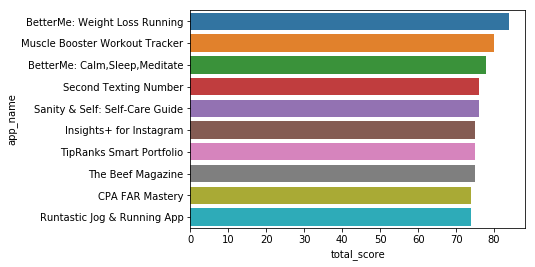

In [0]:
sns.barplot(data = top_scorers, y = 'app_name', x = 'total_score');

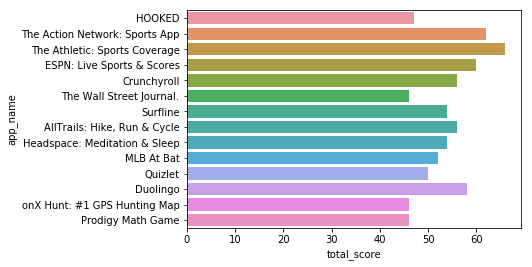

In [0]:
sns.barplot(data = tcg_magic, y = 'app_name', x = 'total_score');